# Vizdnn

In [0]:
# Sample test image
! wget https://miro.medium.com/max/4427/1*WC7OruzNF0GfjfwwCVRO7Q.jpeg

# vizdnn Library

In [0]:
import keras
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import load_img,img_to_array
from keras.models import Model
import matplotlib.pyplot as plt
import numpy as np


class vizdnn:

  def __init__(self, model_arch, layer_name, image_name):
    """
    model_arch: Model architecture 
    layer_name: Neural Network layer of interest
    image_name: Test image name
    """
    self.model = model_arch
    self.layer_name = layer_name
    self.image_name = image_name

  def preprocess_image(self):
    input_width = self.model.input_shape[1]
    input_height = self.model.input_shape[2]
    image = load_img(self.image_name, target_size=(input_width , input_height))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image) 
    return image 


  def get_layer(self):
    model_layers_dic = { layer.name: layer for layer in self.model.layers}
    trimmed_model = Model(inputs=self.model.inputs, outputs= model_layers_dic[self.layer_name].output)
    feature_maps = trimmed_model.predict(self.preprocess_image())
    return feature_maps

  def viz_feature_map(self , feature_map):
      plt.figure(figsize = (25 , 25))
      square = int(np.sqrt(feature_map.shape[-1]))
      index = 1
      for _ in range(square):
        for _ in range(square):
          ax = plt.subplot(square, square, index)
          ax.set_xticks([])
          ax.set_yticks([])
          plt.imshow(feature_map[0, :, :, index-1] , cmap= 'YlOrRd')
          index += 1
      return plt.show()




## VGG Example

In [0]:
visualize_neural_network = vizdnn(VGG16() , "block2_conv1" , "1*WC7OruzNF0GfjfwwCVRO7Q.jpeg")

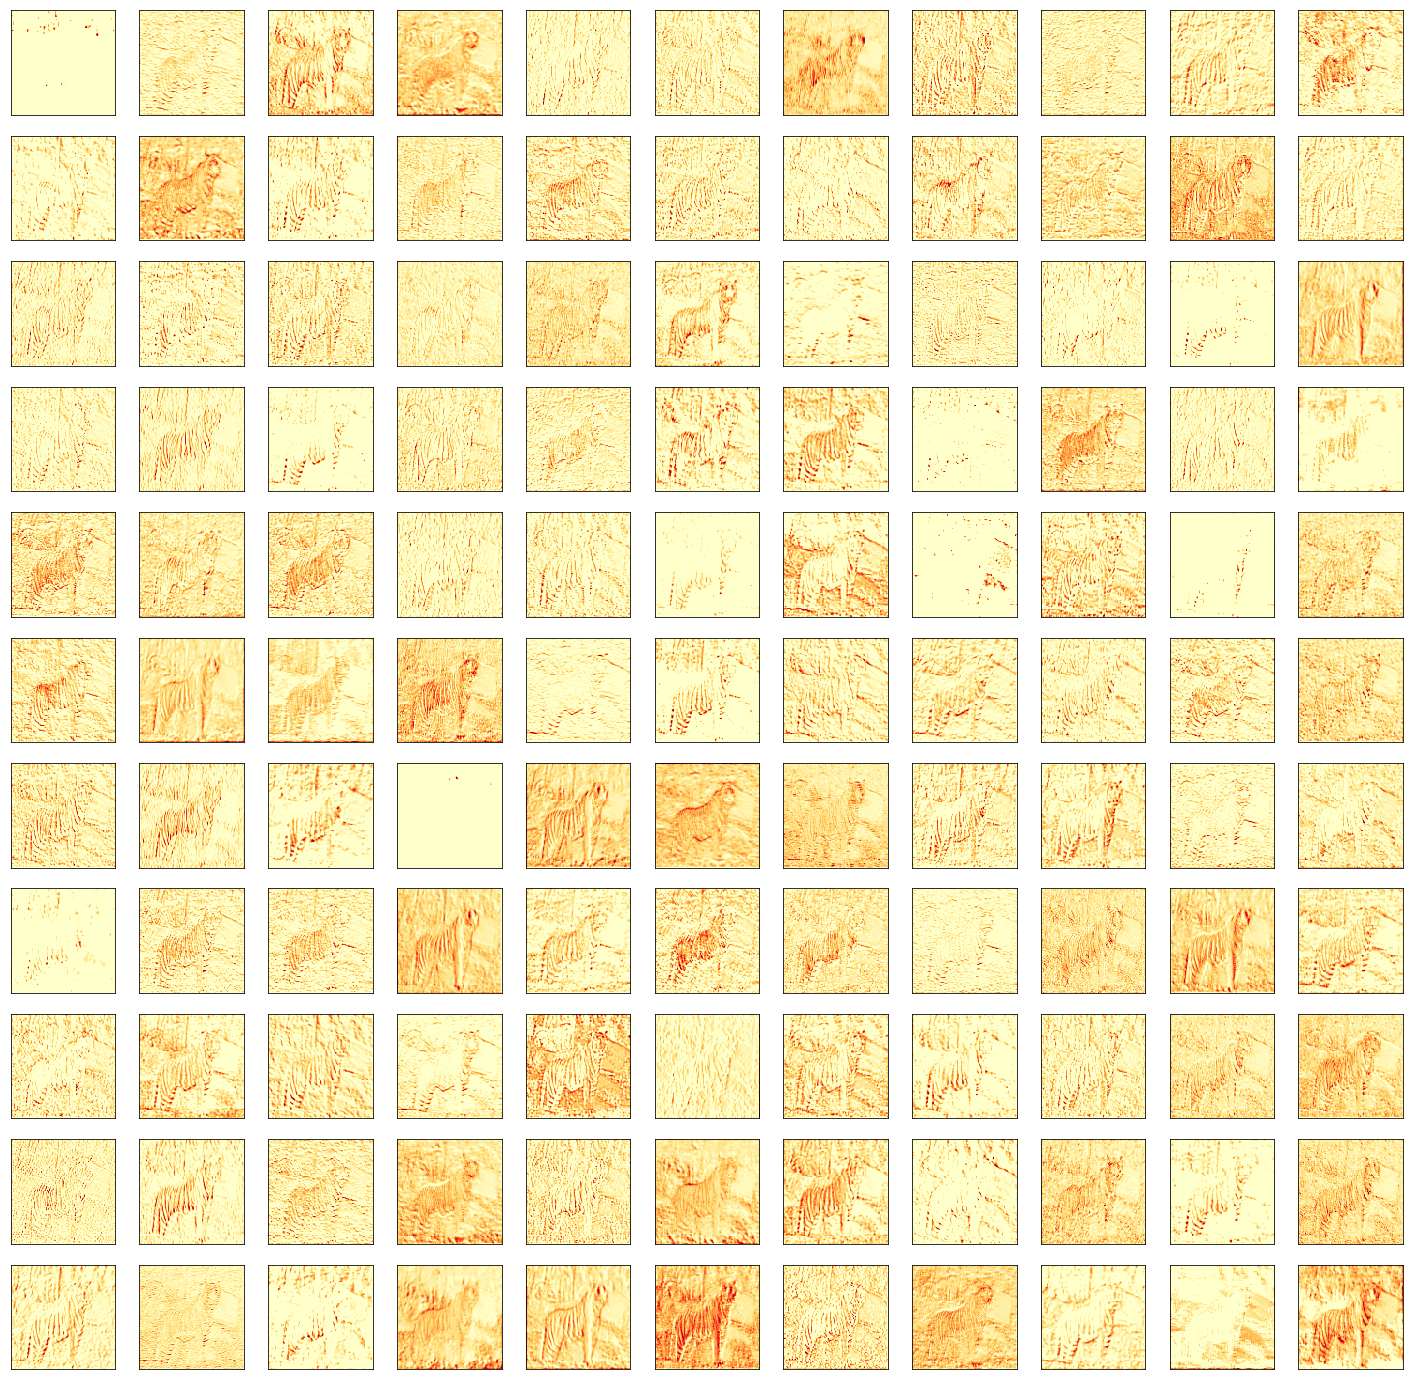

In [6]:
vgg_layer  = visualize_neural_network.get_layer()
visualize_neural_network.viz_feature_map(vgg_layer)

## Resnet Example

In [7]:
# Downlaoding pre-trained resnet model
resnet_model = keras.applications.resnet.ResNet50()
resnet_model.summary()



102973440/102967424 [==============================] - 4s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________

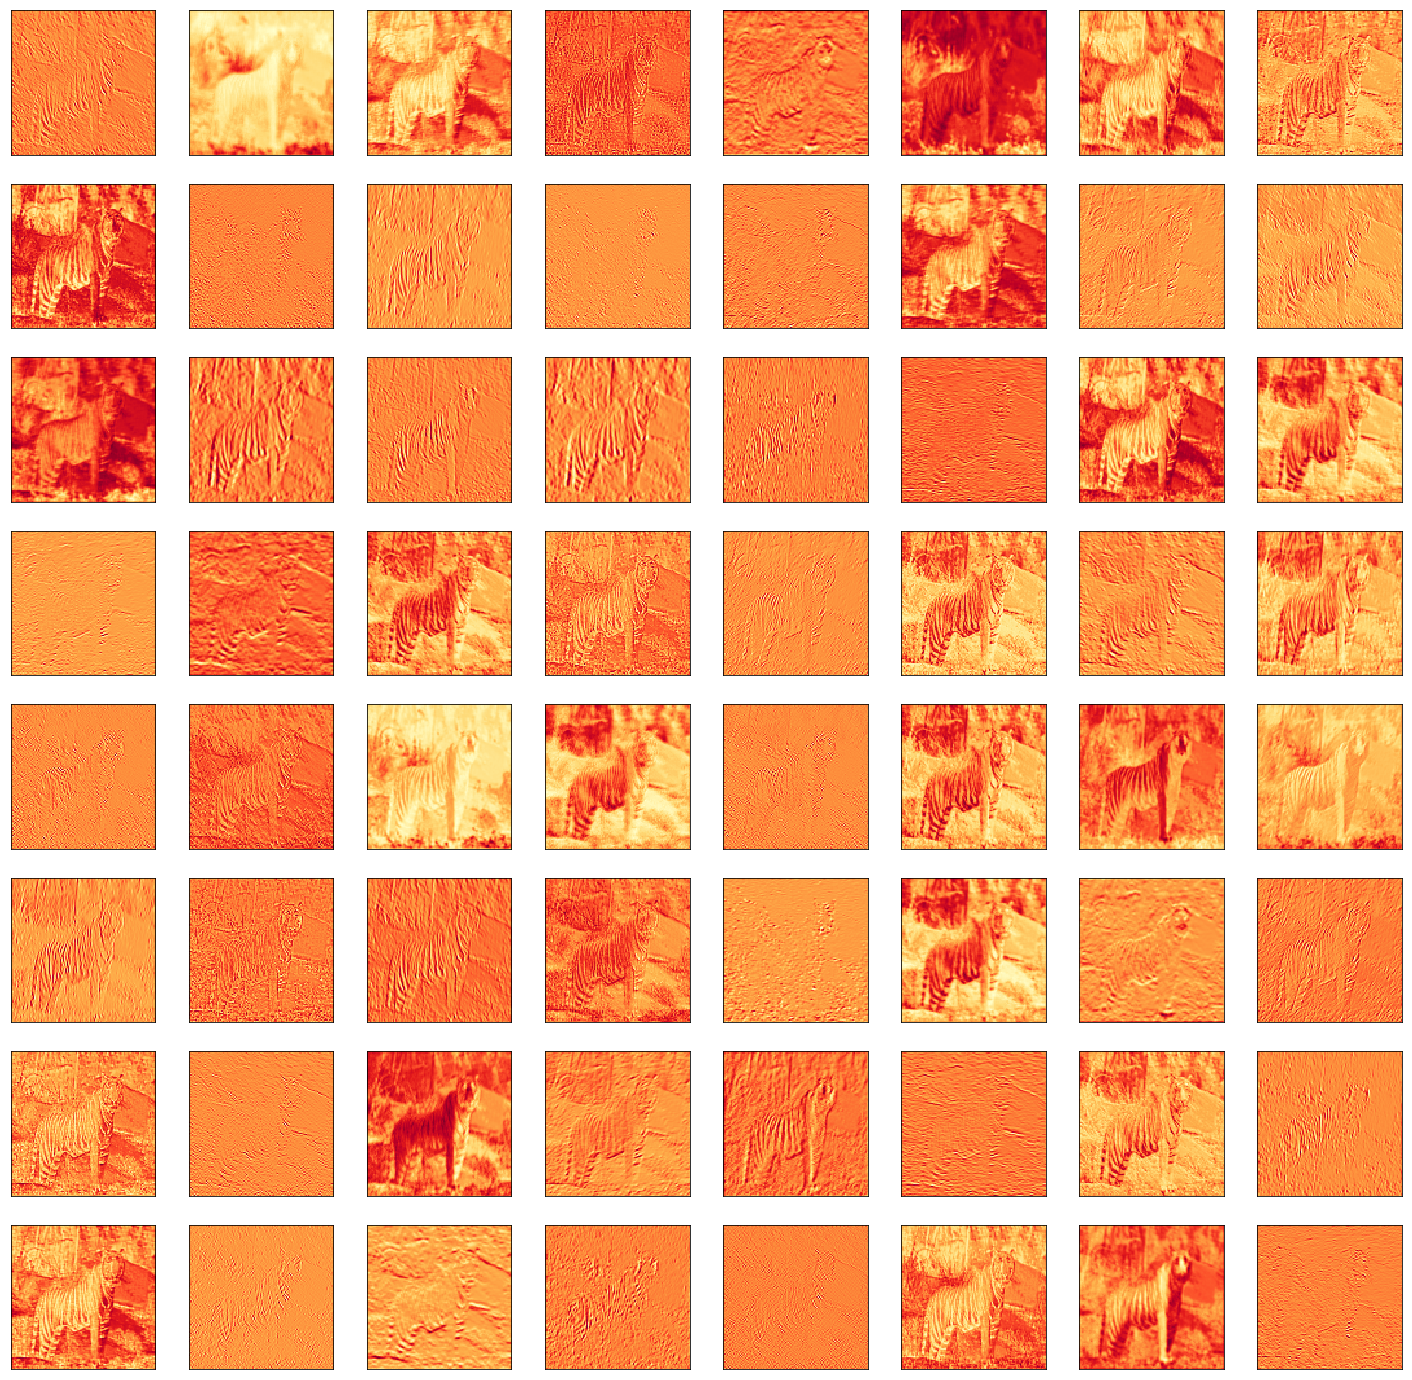

In [0]:
visualize_neural_network = vizdnn(keras.applications.resnet.ResNet50() , "conv1_bn" , "1*WC7OruzNF0GfjfwwCVRO7Q.jpeg")
vis = visualize_neural_network.get_layer()
see_feature_maps(vis)